In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r SouthAfrica_2021

In [5]:
SouthAfrica_2021

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,0,NP Kenjige (USA),6,4,1,25,13,8.33,50,50.00,...,179,10,3/22,17.90,3.94,27.2,0,0,6,0
2,2,Aaron Jones (USA),1,1,0,22,22,22.00,33,66.66,...,-,-,-,-,-,-,-,-,1,0
28,28,T Bavuma (SA),7,6,2,164,92,41.00,205,80.00,...,-,-,-,-,-,-,-,-,4,0
67,67,Q de Kock (SA),3,3,0,220,120,73.33,195,112.82,...,-,-,-,-,-,-,-,-,6,0
77,77,DM Dupavillon (SA),1,1,0,17,17,17.00,10,170.00,...,30,0,-,-,6.00,-,0,0,0,0
80,80,SA Edwards (NED),6,5,0,84,56,16.80,120,70.00,...,-,-,-,-,-,-,-,-,5,0
93,93,K Gore (USA),6,5,0,80,44,16.00,95,84.21,...,136,3,1/14,45.33,4.85,56.0,0,0,4,0
109,109,BE Hendricks (SA),1,1,0,1,1,1.00,5,20.00,...,38,0,-,-,5.42,-,0,0,0,0
110,110,RR Hendricks (SA),3,3,0,58,51,19.33,71,81.69,...,-,-,-,-,-,-,-,-,2,0
119,119,EH Hutchinson (USA),5,3,1,67,49*,33.50,79,84.81,...,106,3,1/12,35.33,3.92,54.0,0,0,2,0


In [6]:
SouthAfrica_2021=SouthAfrica_2021.reset_index()

In [7]:
SouthAfrica_2021

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,0,0,NP Kenjige (USA),6,4,1,25,13,8.33,50,...,179,10,3/22,17.90,3.94,27.2,0,0,6,0
1,2,2,Aaron Jones (USA),1,1,0,22,22,22.00,33,...,-,-,-,-,-,-,-,-,1,0
2,28,28,T Bavuma (SA),7,6,2,164,92,41.00,205,...,-,-,-,-,-,-,-,-,4,0
3,67,67,Q de Kock (SA),3,3,0,220,120,73.33,195,...,-,-,-,-,-,-,-,-,6,0
4,77,77,DM Dupavillon (SA),1,1,0,17,17,17.00,10,...,30,0,-,-,6.00,-,0,0,0,0
5,80,80,SA Edwards (NED),6,5,0,84,56,16.80,120,...,-,-,-,-,-,-,-,-,5,0
6,93,93,K Gore (USA),6,5,0,80,44,16.00,95,...,136,3,1/14,45.33,4.85,56.0,0,0,4,0
7,109,109,BE Hendricks (SA),1,1,0,1,1,1.00,5,...,38,0,-,-,5.42,-,0,0,0,0
8,110,110,RR Hendricks (SA),3,3,0,58,51,19.33,71,...,-,-,-,-,-,-,-,-,2,0
9,119,119,EH Hutchinson (USA),5,3,1,67,49*,33.50,79,...,106,3,1/12,35.33,3.92,54.0,0,0,2,0


In [8]:
SouthAfrica_2021.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
SouthAfrica_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,NP Kenjige (USA),6,4,1,25,13,8.33,50,50.00,0,...,179,10,3/22,17.90,3.94,27.2,0,0,6,0
1,Aaron Jones (USA),1,1,0,22,22,22.00,33,66.66,0,...,-,-,-,-,-,-,-,-,1,0
2,T Bavuma (SA),7,6,2,164,92,41.00,205,80.00,0,...,-,-,-,-,-,-,-,-,4,0
3,Q de Kock (SA),3,3,0,220,120,73.33,195,112.82,1,...,-,-,-,-,-,-,-,-,6,0
4,DM Dupavillon (SA),1,1,0,17,17,17.00,10,170.00,0,...,30,0,-,-,6.00,-,0,0,0,0
5,SA Edwards (NED),6,5,0,84,56,16.80,120,70.00,0,...,-,-,-,-,-,-,-,-,5,0
6,K Gore (USA),6,5,0,80,44,16.00,95,84.21,0,...,136,3,1/14,45.33,4.85,56.0,0,0,4,0
7,BE Hendricks (SA),1,1,0,1,1,1.00,5,20.00,0,...,38,0,-,-,5.42,-,0,0,0,0
8,RR Hendricks (SA),3,3,0,58,51,19.33,71,81.69,0,...,-,-,-,-,-,-,-,-,2,0
9,EH Hutchinson (USA),5,3,1,67,49*,33.50,79,84.81,0,...,106,3,1/12,35.33,3.92,54.0,0,0,2,0


In [10]:
SouthAfrica_2021_players =SouthAfrica_2021.copy()

In [11]:
SouthAfrica_2021_players.drop('Player',axis=1,inplace=True)

In [12]:
SouthAfrica_2021_players.HS=SouthAfrica_2021_players.HS.str.extract('(\d+)')
SouthAfrica_2021_players['HS'].fillna(value=0, inplace=True)


In [13]:
SouthAfrica_2021_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,6,4,1,25,13,8.33,50,50.00,0,0,...,179,10,3/22,17.90,3.94,27.2,0,0,6,0
1,1,1,0,22,22,22.00,33,66.66,0,0,...,-,-,-,-,-,-,-,-,1,0
2,7,6,2,164,92,41.00,205,80.00,0,1,...,-,-,-,-,-,-,-,-,4,0
3,3,3,0,220,120,73.33,195,112.82,1,1,...,-,-,-,-,-,-,-,-,6,0
4,1,1,0,17,17,17.00,10,170.00,0,0,...,30,0,-,-,6.00,-,0,0,0,0
5,6,5,0,84,56,16.80,120,70.00,0,1,...,-,-,-,-,-,-,-,-,5,0
6,6,5,0,80,44,16.00,95,84.21,0,0,...,136,3,1/14,45.33,4.85,56.0,0,0,4,0
7,1,1,0,1,1,1.00,5,20.00,0,0,...,38,0,-,-,5.42,-,0,0,0,0
8,3,3,0,58,51,19.33,71,81.69,0,1,...,-,-,-,-,-,-,-,-,2,0
9,5,3,1,67,49,33.50,79,84.81,0,0,...,106,3,1/12,35.33,3.92,54.0,0,0,2,0


In [14]:
SouthAfrica_2021_players.replace("-",0,inplace=True)

In [15]:
SouthAfrica_2021_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

SouthAfrica_2021_players_scaled = pd.DataFrame(scaler.fit_transform(SouthAfrica_2021_players),columns=SouthAfrica_2021_players.columns)
SouthAfrica_2021_players_scaled.shape
SouthAfrica_2021_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.673005,0.314878,0.475002,-0.562939,-0.629577,-0.681859,-0.410738,-0.690491,-0.337526,-0.628121,...,0.256805,0.927372,1.851659,-0.000195,0.225540,0.239161,-0.316228,-0.152499,1.704305,-0.152499
1,-1.201186,-0.983993,-0.686114,-0.591033,-0.430446,-0.093386,-0.561342,-0.222187,-0.337526,-0.628121,...,-0.550297,-0.731493,-0.639870,-0.615431,-1.203018,-0.675014,-0.316228,-0.152499,-0.402139,-0.152499
2,1.047843,1.180791,1.636117,0.738738,1.118355,0.724536,0.962415,0.152794,-0.337526,0.826475,...,-0.550297,-0.731493,-0.639870,-0.615431,-1.203018,-0.675014,-0.316228,-0.152499,0.861727,-0.152499
3,-0.451510,-0.118079,-0.686114,1.263155,1.737875,2.116294,0.873825,1.075349,2.137667,0.826475,...,-0.550297,-0.731493,-0.639870,-0.615431,-1.203018,-0.675014,-0.316228,-0.152499,1.704305,-0.152499
4,-1.201186,-0.983993,-0.686114,-0.637856,-0.541074,-0.308628,-0.765100,2.682651,-0.337526,-0.628121,...,-0.550297,-0.453471,-0.639870,-0.615431,0.972451,-0.675014,-0.316228,-0.152499,-0.823428,-0.152499


In [17]:
SouthAfrica_2021_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,...,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01
mean,1.614870e-16,-9.588290e-17,-7.065056e-17,-3.784851e-18,6.308085e-17,-1.312082e-16,5.614196e-17,1.261617e-18,5.298792e-17,-2.523234e-18,...,5.046468e-18,-5.046468e-18,-4.541821e-17,-7.569702e-17,-1.513940e-16,-4.541821e-17,-1.766264e-17,-3.532528e-17,-6.560409e-17,-5.551115e-17
std,1.011561e+00,1.011561e+00,1.011561e+00,1.011561e+00,1.011561e+00,1.011561e+00,1.011561e+00,1.011561e+00,1.011561e+00,1.011561e+00,...,1.011561e+00,1.011561e+00,1.011561e+00,1.011561e+00,1.011561e+00,1.011561e+00,1.011561e+00,1.011561e+00,1.011561e+00,1.011561e+00
min,-1.201186e+00,-1.416950e+00,-6.861138e-01,-7.970539e-01,-9.172117e-01,-1.040453e+00,-8.536906e-01,-2.095967e+00,-3.375264e-01,-6.281206e-01,...,-5.502966e-01,-7.314927e-01,-6.398698e-01,-6.154309e-01,-1.203018e+00,-6.750140e-01,-3.162278e-01,-1.524986e-01,-8.234285e-01,-1.524986e-01
25%,-8.263478e-01,-9.839927e-01,-6.861138e-01,-7.057492e-01,-7.346745e-01,-7.660188e-01,-7.296639e-01,-6.027896e-01,-3.375264e-01,-6.281206e-01,...,-5.502966e-01,-7.314927e-01,-6.398698e-01,-6.154309e-01,-1.203018e+00,-6.750140e-01,-3.162278e-01,-1.524986e-01,-8.234285e-01,-1.524986e-01
50%,-7.667145e-02,-1.180791e-01,-6.861138e-01,-2.960486e-01,-4.746973e-01,-3.056150e-01,-3.487246e-01,1.527944e-01,-3.375264e-01,-6.281206e-01,...,-5.502966e-01,-4.395696e-01,-6.398698e-01,-6.154309e-01,2.074112e-01,-6.750140e-01,-3.162278e-01,-1.524986e-01,-4.021395e-01,-1.524986e-01
75%,6.730049e-01,7.478345e-01,4.750018e-01,3.922484e-01,2.886401e-01,4.285772e-01,3.732883e-01,5.663558e-01,-3.375264e-01,8.264745e-01,...,2.568051e-01,3.203572e-01,1.075887e-01,4.183539e-01,7.694074e-01,4.626637e-01,-3.162278e-01,-1.524986e-01,5.457607e-01,-1.524986e-01
max,2.172358e+00,2.479662e+00,2.797233e+00,3.969520e+00,2.999041e+00,2.704767e+00,4.045366e+00,2.682651e+00,4.612860e+00,2.281070e+00,...,3.485212e+00,3.003269e+00,2.848270e+00,5.021364e+00,1.831761e+00,4.769706e+00,3.162278e+00,6.557439e+00,2.968172e+00,6.557439e+00


In [18]:
X =  SouthAfrica_2021_players_scaled.iloc[:,:].values

In [19]:
X

array([[ 0.67300492,  0.31487767,  0.47500183, ..., -0.15249857,
         1.70430547, -0.15249857],
       [-1.201186  , -0.98399272, -0.68611376, ..., -0.15249857,
        -0.40213949, -0.15249857],
       [ 1.04784311,  1.18079126,  1.63611742, ..., -0.15249857,
         0.86172748, -0.15249857],
       ...,
       [-0.45150963, -0.11807913,  0.47500183, ..., -0.15249857,
        -0.82342849, -0.15249857],
       [-1.201186  , -0.98399272, -0.68611376, ..., -0.15249857,
        -0.82342849, -0.15249857],
       [-1.201186  , -0.98399272, -0.68611376, ..., -0.15249857,
        -0.82342849, -0.15249857]])

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(SouthAfrica_2021_players_scaled))

False

In [23]:
SouthAfrica_2021_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.673005,0.314878,0.475002,-0.562939,-0.629577,-0.681859,-0.410738,-0.690491,-0.337526,-0.628121,...,0.256805,0.927372,1.851659,-0.000195,0.225540,0.239161,-0.316228,-0.152499,1.704305,-0.152499
1,-1.201186,-0.983993,-0.686114,-0.591033,-0.430446,-0.093386,-0.561342,-0.222187,-0.337526,-0.628121,...,-0.550297,-0.731493,-0.639870,-0.615431,-1.203018,-0.675014,-0.316228,-0.152499,-0.402139,-0.152499
2,1.047843,1.180791,1.636117,0.738738,1.118355,0.724536,0.962415,0.152794,-0.337526,0.826475,...,-0.550297,-0.731493,-0.639870,-0.615431,-1.203018,-0.675014,-0.316228,-0.152499,0.861727,-0.152499
3,-0.451510,-0.118079,-0.686114,1.263155,1.737875,2.116294,0.873825,1.075349,2.137667,0.826475,...,-0.550297,-0.731493,-0.639870,-0.615431,-1.203018,-0.675014,-0.316228,-0.152499,1.704305,-0.152499
4,-1.201186,-0.983993,-0.686114,-0.637856,-0.541074,-0.308628,-0.765100,2.682651,-0.337526,-0.628121,...,-0.550297,-0.453471,-0.639870,-0.615431,0.972451,-0.675014,-0.316228,-0.152499,-0.823428,-0.152499
5,0.673005,0.747834,-0.686114,-0.010429,0.321829,-0.317238,0.209396,-0.128301,-0.337526,0.826475,...,-0.550297,-0.731493,-0.639870,-0.615431,-1.203018,-0.675014,-0.316228,-0.152499,1.283016,-0.152499
6,0.673005,0.747834,-0.686114,-0.047887,0.056320,-0.351677,-0.012081,0.271136,-0.337526,-0.628121,...,1.063907,0.528874,0.107589,0.942593,0.555486,1.207112,-0.316228,-0.152499,0.861727,-0.152499
7,-1.201186,-0.983993,-0.686114,-0.787689,-0.895086,-0.997404,-0.809395,-1.533777,-0.337526,-0.628121,...,-0.550297,-0.379332,-0.639870,-0.615431,0.762156,-0.675014,-0.316228,-0.152499,-0.823428,-0.152499
8,-0.451510,-0.118079,-0.686114,-0.253908,0.211200,-0.208325,-0.224698,0.200300,-0.337526,0.826475,...,-0.550297,-0.731493,-0.639870,-0.615431,-1.203018,-0.675014,-0.316228,-0.152499,0.019149,-0.152499
9,0.298167,-0.118079,0.475002,-0.169627,0.166949,0.401672,-0.153825,0.288001,-0.337526,-0.628121,...,0.256805,0.250852,0.107589,0.598886,0.218289,1.139893,-0.316228,-0.152499,0.019149,-0.152499


In [24]:
np.all(np.isfinite(SouthAfrica_2021_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


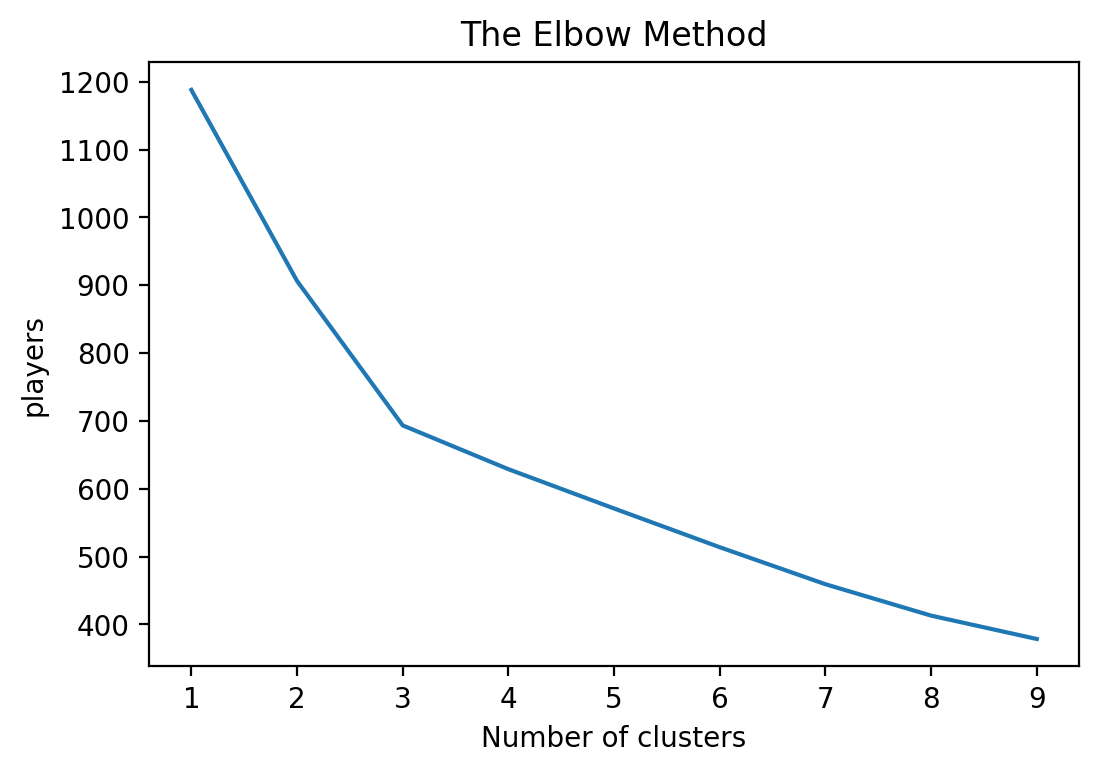

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([2, 1, 0, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1,
       2, 1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [28]:
kmeans.cluster_centers_

array([[ 0.70183863,  0.94766068,  0.29636866,  1.2170522 ,  1.24430107,
         1.12521791,  1.15731454,  0.60576858,  0.80487058,  1.16215031,
        -0.14712688,  1.12745968,  0.91057439, -0.02368155,  0.70183863,
        -0.49068039, -0.48737425, -0.42612713, -0.53260005, -0.50571061,
        -0.43345122, -0.69708188, -0.38804151, -0.31622777, -0.15249857,
         0.82932064,  0.36365044],
       [-0.89774557, -0.77782282, -0.46494888, -0.62447794, -0.58743312,
        -0.52702784, -0.61913662, -0.43407888, -0.33752637, -0.48958776,
         0.01607268, -0.56728918, -0.47696754,  0.10297516, -0.89774557,
        -0.45522894, -0.46584438, -0.35812955, -0.40536849, -0.45003909,
         0.07920104,  0.18427525, -0.03163429, -0.15058465, -0.15249857,
        -0.56263054, -0.15249857],
       [ 0.97287547,  0.40146903,  0.59111339, -0.2707642 , -0.38398184,
        -0.35602483, -0.20432199,  0.12406649, -0.33752637, -0.48266111,
         0.15751231, -0.2743903 , -0.18211488, -0.1854

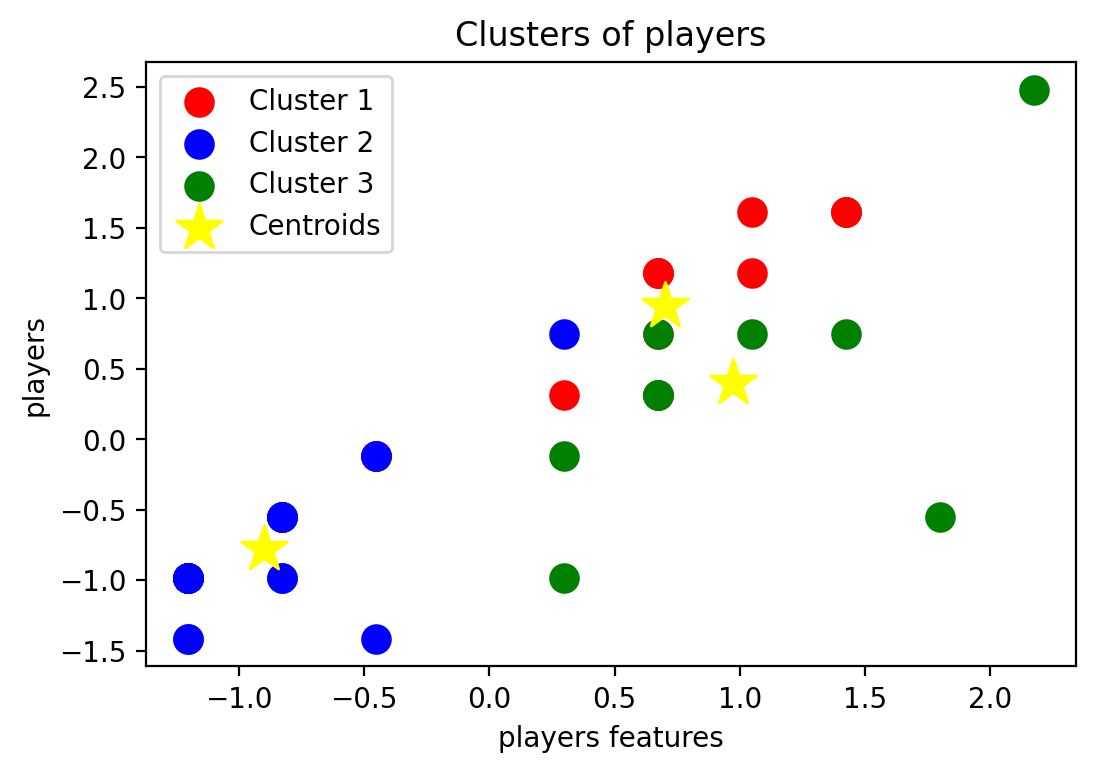

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
SouthAfrica_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,NP Kenjige (USA),6,4,1,25,13,8.33,50,50.00,0,...,179,10,3/22,17.90,3.94,27.2,0,0,6,0
1,Aaron Jones (USA),1,1,0,22,22,22.00,33,66.66,0,...,-,-,-,-,-,-,-,-,1,0
2,T Bavuma (SA),7,6,2,164,92,41.00,205,80.00,0,...,-,-,-,-,-,-,-,-,4,0
3,Q de Kock (SA),3,3,0,220,120,73.33,195,112.82,1,...,-,-,-,-,-,-,-,-,6,0
4,DM Dupavillon (SA),1,1,0,17,17,17.00,10,170.00,0,...,30,0,-,-,6.00,-,0,0,0,0
5,SA Edwards (NED),6,5,0,84,56,16.80,120,70.00,0,...,-,-,-,-,-,-,-,-,5,0
6,K Gore (USA),6,5,0,80,44,16.00,95,84.21,0,...,136,3,1/14,45.33,4.85,56.0,0,0,4,0
7,BE Hendricks (SA),1,1,0,1,1,1.00,5,20.00,0,...,38,0,-,-,5.42,-,0,0,0,0
8,RR Hendricks (SA),3,3,0,58,51,19.33,71,81.69,0,...,-,-,-,-,-,-,-,-,2,0
9,EH Hutchinson (USA),5,3,1,67,49*,33.50,79,84.81,0,...,106,3,1/12,35.33,3.92,54.0,0,0,2,0


In [31]:
SouthAfrica_2021["cluster"] = y_kmeans

In [32]:
SouthAfrica_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,NP Kenjige (USA),6,4,1,25,13,8.33,50,50.00,0,...,10,3/22,17.90,3.94,27.2,0,0,6,0,2
1,Aaron Jones (USA),1,1,0,22,22,22.00,33,66.66,0,...,-,-,-,-,-,-,-,1,0,1
2,T Bavuma (SA),7,6,2,164,92,41.00,205,80.00,0,...,-,-,-,-,-,-,-,4,0,0
3,Q de Kock (SA),3,3,0,220,120,73.33,195,112.82,1,...,-,-,-,-,-,-,-,6,0,0
4,DM Dupavillon (SA),1,1,0,17,17,17.00,10,170.00,0,...,0,-,-,6.00,-,0,0,0,0,1
5,SA Edwards (NED),6,5,0,84,56,16.80,120,70.00,0,...,-,-,-,-,-,-,-,5,0,0
6,K Gore (USA),6,5,0,80,44,16.00,95,84.21,0,...,3,1/14,45.33,4.85,56.0,0,0,4,0,2
7,BE Hendricks (SA),1,1,0,1,1,1.00,5,20.00,0,...,0,-,-,5.42,-,0,0,0,0,1
8,RR Hendricks (SA),3,3,0,58,51,19.33,71,81.69,0,...,-,-,-,-,-,-,-,2,0,1
9,EH Hutchinson (USA),5,3,1,67,49*,33.50,79,84.81,0,...,3,1/12,35.33,3.92,54.0,0,0,2,0,2


In [33]:
SouthAfrica_2021['cluster'].value_counts()

1    21
0    13
2    10
Name: cluster, dtype: int64

In [34]:
SouthAfrica_Cluster_2021 = np.array([13,21,10])

In [35]:
SouthAfrica_Cluster_2021

array([13, 21, 10])

In [36]:
%store SouthAfrica_Cluster_2021

Stored 'SouthAfrica_Cluster_2021' (ndarray)


In [37]:
SouthAfrica_2021_players_scaled.insert(0, 'Player', SouthAfrica_2021.Player)

In [38]:
SouthAfrica_2021_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,NP Kenjige (USA),0.673005,0.314878,0.475002,-0.562939,-0.629577,-0.681859,-0.410738,-0.690491,-0.337526,...,0.256805,0.927372,1.851659,-0.000195,0.225540,0.239161,-0.316228,-0.152499,1.704305,-0.152499
1,Aaron Jones (USA),-1.201186,-0.983993,-0.686114,-0.591033,-0.430446,-0.093386,-0.561342,-0.222187,-0.337526,...,-0.550297,-0.731493,-0.639870,-0.615431,-1.203018,-0.675014,-0.316228,-0.152499,-0.402139,-0.152499
2,T Bavuma (SA),1.047843,1.180791,1.636117,0.738738,1.118355,0.724536,0.962415,0.152794,-0.337526,...,-0.550297,-0.731493,-0.639870,-0.615431,-1.203018,-0.675014,-0.316228,-0.152499,0.861727,-0.152499
3,Q de Kock (SA),-0.451510,-0.118079,-0.686114,1.263155,1.737875,2.116294,0.873825,1.075349,2.137667,...,-0.550297,-0.731493,-0.639870,-0.615431,-1.203018,-0.675014,-0.316228,-0.152499,1.704305,-0.152499
4,DM Dupavillon (SA),-1.201186,-0.983993,-0.686114,-0.637856,-0.541074,-0.308628,-0.765100,2.682651,-0.337526,...,-0.550297,-0.453471,-0.639870,-0.615431,0.972451,-0.675014,-0.316228,-0.152499,-0.823428,-0.152499
5,SA Edwards (NED),0.673005,0.747834,-0.686114,-0.010429,0.321829,-0.317238,0.209396,-0.128301,-0.337526,...,-0.550297,-0.731493,-0.639870,-0.615431,-1.203018,-0.675014,-0.316228,-0.152499,1.283016,-0.152499
6,K Gore (USA),0.673005,0.747834,-0.686114,-0.047887,0.056320,-0.351677,-0.012081,0.271136,-0.337526,...,1.063907,0.528874,0.107589,0.942593,0.555486,1.207112,-0.316228,-0.152499,0.861727,-0.152499
7,BE Hendricks (SA),-1.201186,-0.983993,-0.686114,-0.787689,-0.895086,-0.997404,-0.809395,-1.533777,-0.337526,...,-0.550297,-0.379332,-0.639870,-0.615431,0.762156,-0.675014,-0.316228,-0.152499,-0.823428,-0.152499
8,RR Hendricks (SA),-0.451510,-0.118079,-0.686114,-0.253908,0.211200,-0.208325,-0.224698,0.200300,-0.337526,...,-0.550297,-0.731493,-0.639870,-0.615431,-1.203018,-0.675014,-0.316228,-0.152499,0.019149,-0.152499
9,EH Hutchinson (USA),0.298167,-0.118079,0.475002,-0.169627,0.166949,0.401672,-0.153825,0.288001,-0.337526,...,0.256805,0.250852,0.107589,0.598886,0.218289,1.139893,-0.316228,-0.152499,0.019149,-0.152499


In [39]:
SouthAfrica_2021_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,NP Kenjige (USA),-0.681859,-0.000195
1,Aaron Jones (USA),-0.093386,-0.615431
2,T Bavuma (SA),0.724536,-0.615431
3,Q de Kock (SA),2.116294,-0.615431
4,DM Dupavillon (SA),-0.308628,-0.615431
5,SA Edwards (NED),-0.317238,-0.615431
6,K Gore (USA),-0.351677,0.942593
7,BE Hendricks (SA),-0.997404,-0.615431
8,RR Hendricks (SA),-0.208325,-0.615431
9,EH Hutchinson (USA),0.401672,0.598886


In [40]:
SouthAfrica_2021_Ave=SouthAfrica_2021_players_scaled.mean()

In [41]:
SouthAfrica_2021_Ave

Mat_x           1.614870e-16
Inns_x         -9.588290e-17
NO             -7.065056e-17
Runs_x         -3.784851e-18
HS              6.308085e-17
Ave_x          -1.312082e-16
BF              5.614196e-17
SR_x            1.261617e-18
100             5.298792e-17
50             -2.523234e-18
0               9.335966e-17
4s              3.154043e-17
6s             -5.424953e-17
Unnamed: 0_y    3.280204e-16
Mat_y           1.614870e-16
Inns_y         -2.523234e-17
Overs           5.551115e-17
Mdns            5.046468e-18
Runs_y         -5.046468e-18
Wkts           -4.541821e-17
Ave_y          -7.569702e-17
Econ           -1.513940e-16
SR_y           -4.541821e-17
4              -1.766264e-17
5              -3.532528e-17
Ct             -6.560409e-17
St             -5.551115e-17
dtype: float64

In [42]:
SouthAfrica_Ave_2021 =SouthAfrica_2021_Ave[['Ave_x','Ave_y']]

In [43]:
SouthAfrica_Ave_2021

Ave_x   -1.312082e-16
Ave_y   -7.569702e-17
dtype: float64

In [44]:
SouthAfrica_Ave_2021 = np.array([SouthAfrica_Ave_2021.Ave_x, SouthAfrica_Ave_2021.Ave_y])

In [45]:
SouthAfrica_Ave_2021

array([-1.31208176e-16, -7.56970244e-17])

In [46]:
%store SouthAfrica_Ave_2021

Stored 'SouthAfrica_Ave_2021' (ndarray)


In [47]:
SouthAfrica_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,NP Kenjige (USA),6,4,1,25,13,8.33,50,50.00,0,...,10,3/22,17.90,3.94,27.2,0,0,6,0,2
1,Aaron Jones (USA),1,1,0,22,22,22.00,33,66.66,0,...,-,-,-,-,-,-,-,1,0,1
2,T Bavuma (SA),7,6,2,164,92,41.00,205,80.00,0,...,-,-,-,-,-,-,-,4,0,0
3,Q de Kock (SA),3,3,0,220,120,73.33,195,112.82,1,...,-,-,-,-,-,-,-,6,0,0
4,DM Dupavillon (SA),1,1,0,17,17,17.00,10,170.00,0,...,0,-,-,6.00,-,0,0,0,0,1
5,SA Edwards (NED),6,5,0,84,56,16.80,120,70.00,0,...,-,-,-,-,-,-,-,5,0,0
6,K Gore (USA),6,5,0,80,44,16.00,95,84.21,0,...,3,1/14,45.33,4.85,56.0,0,0,4,0,2
7,BE Hendricks (SA),1,1,0,1,1,1.00,5,20.00,0,...,0,-,-,5.42,-,0,0,0,0,1
8,RR Hendricks (SA),3,3,0,58,51,19.33,71,81.69,0,...,-,-,-,-,-,-,-,2,0,1
9,EH Hutchinson (USA),5,3,1,67,49*,33.50,79,84.81,0,...,3,1/12,35.33,3.92,54.0,0,0,2,0,2
